# differential calculus

In [2]:
def function_1(x):
    return 0.01 * x ** 2 + 0.1 * x

In [3]:
import numpy as np
import matplotlib.pylab as plt

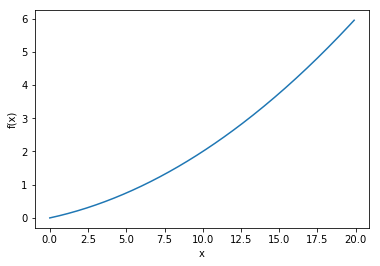

In [4]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [5]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)

In [6]:
numerical_diff(function_1, 5)

0.1999999999990898

In [7]:
numerical_diff(function_1, 10)

0.2999999999986347

In [9]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad

In [10]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    
    return x

In [11]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [12]:
init_x = np.array([-3.0, 4.0])

In [14]:
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([ -1.25592487e-19,   1.66263303e-19])

実際にニューラルネットワークで勾配を求めてみる．

In [16]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np

In [18]:
from common.functions import softmax, cross_entropy_error

In [20]:
from common.gradient import numerical_gradient

In [21]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, f):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [39]:
net = simpleNet()

In [40]:
print(net.W) # ネットワークの各重み

[[-0.32490927  0.96319106  0.20632529]
 [-1.04045982 -1.0437263   0.50906684]]


In [24]:
x = np.array([0.6, 0.9]) # 入力した値

In [25]:
p = net.predict(x) # 予測関数

In [26]:
print(p) この時点だとまだ恒等関数噛ませていないので0〜1になっていない

[ 0.31476094 -0.69236654  1.14084748]


In [27]:
np.argmax(p) # ネットワークが予測したラベル（最大のインデックス）

2

In [29]:
t = np.array([0,0,1]) # 正解ラベル

In [30]:
net.loss(x, t)

0.46853875361689684

In [31]:
def f(W):
    return net.loss(x, t)

In [34]:
dW = numerical_gradient(f, net.W)
dW

array([[ 0.16440031,  0.06004996, -0.22445027],
       [ 0.24660046,  0.09007494, -0.3366754 ]])

In [35]:
net.W

array([[-0.55460465, -0.51406231,  1.7839844 ],
       [ 0.71947081, -0.42658795,  0.07828537]])